# Example test code
The following code showcases how exactly to use the simulator

In [7]:
# autoreloading magic
%load_ext autoreload
%autoreload 2

# this adds the parent directory into the path, since we want simulations from the parent directory
import sys; sys.path.insert(0, '..') 

import pandas as pd
import numpy as np
from simulator import Simulator, Demand, run_simulations
from resources import BasicResource, ResourcePackage, BasicCallData, BasicGas, Basefee
from resources import IndependentResources, CorrelatedResources, IndividualResources, JointResources
from oracle import Oracle
import matplotlib.pyplot as plt

# save into hdf5 file
import os
import h5py
import uuid

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Instructions
1. Create your basefee object. If your resource is of type split, create only one basefee object and ResourcePackage will automatically split it for you. Else, follow instructions below
2. Create your ResourcePackage. Options include: IndependentResources, CorrelatedResources, IndividualResources, and JointResources
3. Create your Demand class and pass in ResourcePackage as one of the variables
4. Create your Simulator class with only the Demand class as the input. All relevant data will have been extracted from previous inputs.
5. Run sim.simulation(step_count) to evolve the system step_count number of times

## Independent Resources (X+Y =Z)
Here, we generate one pareto value and split it randomly such that both resources are uncorrelated. The ratio parameter doesn't really matter, it exists for backwards compatibility

In [8]:
bf_standard_value = 38.100002694
bf_standard = Basefee(1.0 / 8, 15000000, 30000000, bf_standard_value)
resource_package = IndependentResources(["gas","call_data"],[0.3,0.7],bf_standard)
demand = Demand(2000, 0, 400, resource_package)
sim = Simulator(demand)
sim.simulate(10)

({'gas': [38.100002694,
   42.85596203475219,
   48.20569161822734,
   53.196295390173646,
   59.84568250748724,
   67.32294958342418,
   75.73446272553723,
   83.73278736139487,
   94.19841490288731,
   105.97318242185364,
   112.1583812458731],
  'call_data': [38.100002694,
   41.811772508668405,
   41.020624053823084,
   46.13888530164369,
   50.69619530362092,
   55.21679986373313,
   60.13486958970914,
   67.64671959048718,
   75.49727994481144,
   84.00367599261037,
   92.01035261064423]},
 {'blocks': [[{'gas price': 91.16586457540764,
     'gas limit': 775744.0509818438,
     'call_data price': 91.16586457540764,
     'call_data limit': 1866875.407425359,
     'time': 0.0,
     'total_value': 240916687.66948813,
     'profit': 140232879.1849569},
    {'gas price': 100.54472835930441,
     'gas limit': 823413.9770039123,
     'call_data price': 100.54472835930441,
     'call_data limit': 721010.3973229112,
     'time': 0.0,
     'total_value': 155283729.18817914,
     'profit': 9

## Correlated Resources (X+Y=Z)
Here, we generate one pareto value and split it with the given ratio. Eg, in this case 30% is gas and 70% is call data

In [9]:
bf_standard_value = 38.100002694
bf_standard = Basefee(1.0 / 8, 15000000, 30000000, bf_standard_value)
resource_package = CorrelatedResources(["gas","call_data"],[0.3,0.7],bf_standard)
demand = Demand(2000, 0, 400, resource_package)
sim = Simulator(demand)
sim.simulate(10)

({'gas': [38.100002694,
   42.85882048188531,
   48.185386201825985,
   54.20225484253862,
   60.975212900234034,
   68.59275676135736,
   77.15832726877524,
   86.80115029681589,
   97.6485535961994,
   89.7336718028818,
   89.37123202933398],
  'call_data': [38.100002694,
   42.85882048188531,
   48.185386201825985,
   54.202254842538636,
   60.97521290023405,
   68.5927567613574,
   77.15832726877532,
   86.80115029681599,
   97.64855359619953,
   89.73367180288191,
   89.3712320293341]},
 {'blocks': [[{'gas price': 106.74167272771882,
     'gas limit': 2400000.0,
     'call_data price': 106.74167272771882,
     'call_data limit': 5600000.0,
     'time': 0.0,
     'total_value': 853933381.8217506,
     'profit': 549133360.2697506},
    {'gas price': 88.43930304818035,
     'gas limit': 1122544.8675505477,
     'call_data price': 88.43930304818035,
     'call_data limit': 2619271.3576179445,
     'time': 0.0,
     'total_value': 330923619.0882745,
     'profit': 188360410.828902},
  

# Individual Resources (X+Y)
Here, we generate 2 resources individually with no given ratio. They can have an individual basefee for each resource and work without a basefee max limit.

In [10]:
bf_standard_value = 38.100002694
bf_standard = Basefee(1.0 / 8, 15000000, 30000000, bf_standard_value)
resource_package = IndividualResources([BasicGas(bf_standard),BasicCallData(bf_standard)])
demand = Demand(2000, 0, 400, resource_package)
sim = Simulator(demand)
sim.simulate(10)

({'gas': [38.100002694,
   42.855982256028234,
   42.10636262587139,
   41.445720300714655,
   40.78290589540642,
   40.153618313804955,
   39.485256633853645,
   38.873290255341175,
   38.26653671209866,
   37.65367996514016,
   37.03792335411441],
  'call_data': [38.100002694,
   37.504522678187136,
   36.85072547690667,
   36.2771452561705,
   35.69495709784382,
   35.14493494721186,
   34.55659289324575,
   34.02231441431501,
   33.50203081336931,
   32.95928090441218,
   32.414733474253545]},
 {'blocks': [[{'gas price': 71.03746787437534,
     'gas limit': 1677762.0019792917,
     'call_data price': 71.03746787437534,
     'call_data limit': 951.3607243916947,
     'time': 0.0,
     'total_value': 119251546.5733475,
     'profit': 55292562.931883365},
    {'gas price': 64.58199157933778,
     'gas limit': 1272512.730083567,
     'call_data price': 64.58199157933778,
     'call_data limit': 1355.4031241225268,
     'time': 0.0,
     'total_value': 82268941.05200575,
     'profit': 

## Joint Resources
This is building upon Adam's code of generating data points jointly. More operational details should be referred to resources.py

In [10]:
j = JointResources(["gas","call_data"])
demand = Demand(2000, 0, 400, j)
sim = Simulator(demand)
sim.simulate(10)

({'gas': [38.100002694,
   42.844544812721765,
   42.18535151665104,
   41.53455074938106,
   40.89818645821974,
   40.27259014028455,
   39.65433057987178,
   39.05172290431698,
   38.4521776661929,
   37.86448111552088,
   37.28422465107377],
  'call_data': [38.100002694,
   37.504377896840225,
   36.92697381594519,
   36.361617319812915,
   35.79903635652205,
   35.24988096208165,
   34.712880526530896,
   34.1850542390858,
   33.65815145435586,
   33.144855925055246,
   32.63578194040832]},
 {'blocks': [[{'gas price': 67.55375793071067,
     'gas limit': 648309.771182525,
     'call_data price': 67.55375793071067,
     'call_data limit': 456.0,
     'time': 0.0,
     'total_value': 43826565.86019512,
     'profit': 19108588.230365936},
    {'gas price': 66.56325827594891,
     'gas limit': 506427.63337816444,
     'call_data price': 66.56325827594891,
     'call_data limit': 136.0,
     'time': 0.0,
     'total_value': 33718525.96175385,
     'profit': 14418450.16536336},
    {'gas

## Generating multiple simulations and taking its average
Here is example code showing how to run these simulations over multiple iterations. Simply pass in the Simulator object into run_simulations and it will output individual and averaged data files and plot the final average basefee over time.

Saving hdf5 as meip_data-dimensions-2-JOINT-block_method-None-d3d0d4e0.hdf5
Saving csv as meip_data-dimensions-2-JOINT-block_method-None-d3d0d4e0.csv
Saving figure as meip_data-dimensions-2-JOINT-block_method-None-d3d0d4e0
Saving hdf5 as meip_data-dimensions-2-JOINT-block_method-None-d3ec99e6.hdf5
Saving csv as meip_data-dimensions-2-JOINT-block_method-None-d3ec99e6.csv
Saving figure as meip_data-dimensions-2-JOINT-block_method-None-d3ec99e6
Saving hdf5 as meip_data-dimensions-2-JOINT-block_method-None-averaged.hdf5
Saving csv as meip_data-dimensions-2-JOINT-block_method-None-averaged.csv
Saving figure as meip_data-dimensions-2-JOINT-block_method-None-averaged


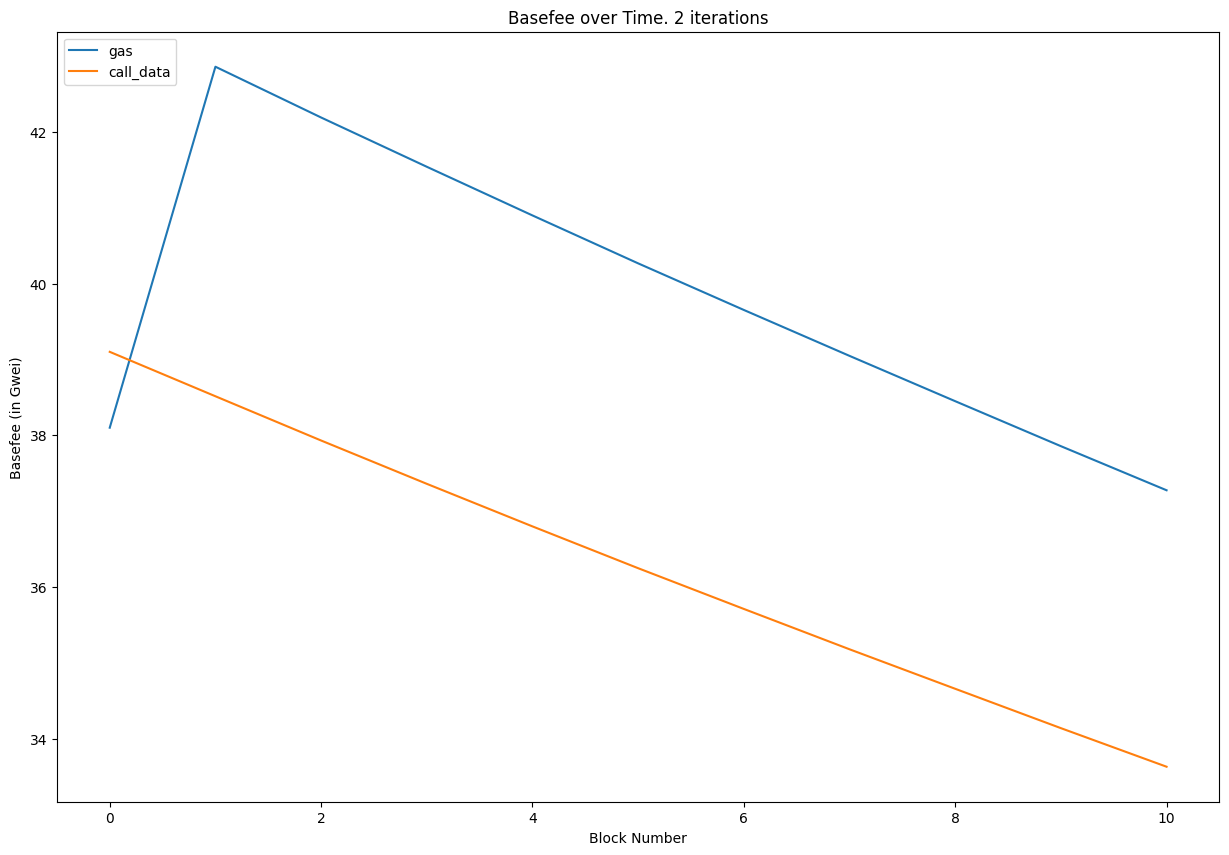

{'gas': [38.100002694,
  42.85848897856398,
  42.189077952758694,
  41.539653233920944,
  40.89813371260079,
  40.266282161563296,
  39.65209385461467,
  39.046795046612885,
  38.44953178326805,
  37.85653868912725,
  37.27521404290987],
 'call_data': [39.100002694,
  38.514405102949574,
  37.931077267938946,
  37.36012208530326,
  36.79900314507916,
  36.24781216052273,
  35.71092482652104,
  35.17910181373129,
  34.658363069097035,
  34.13944196571795,
  33.63092038213103]}

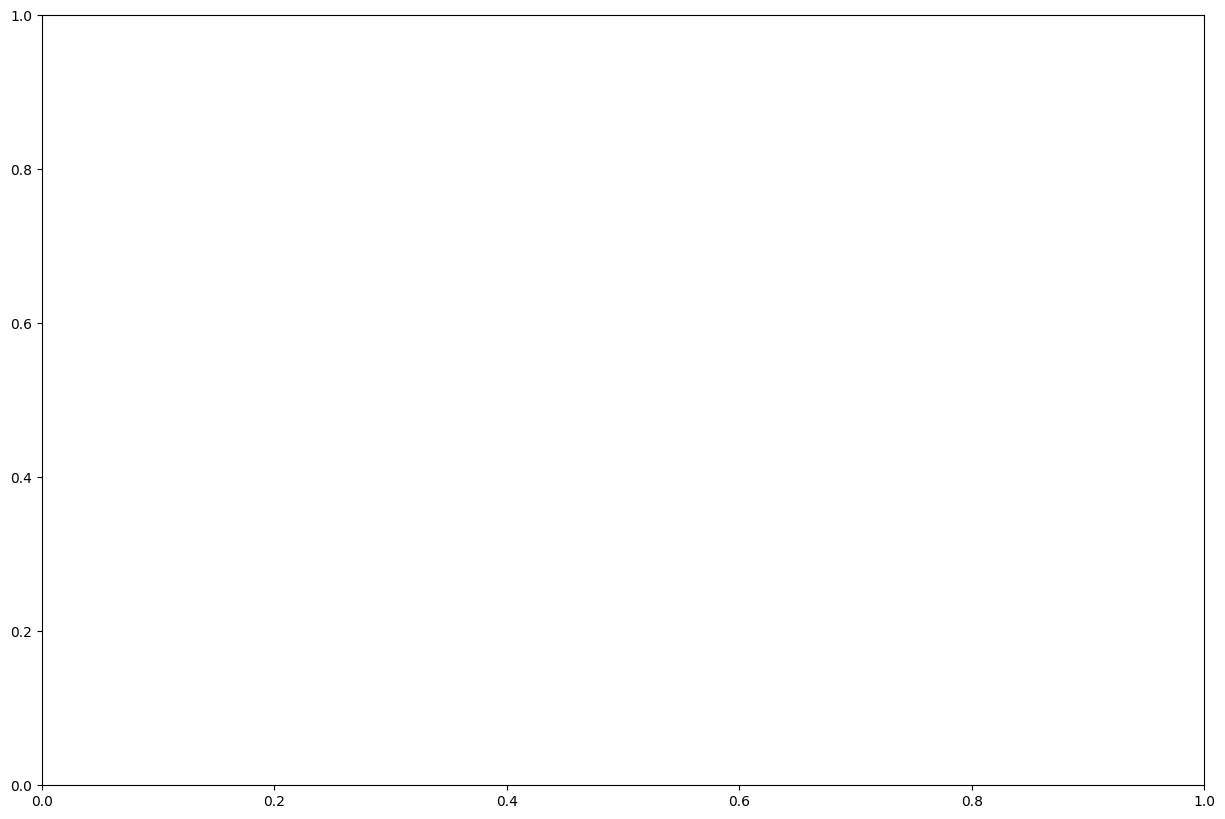

In [18]:
j = JointResources(["gas","call_data"])
demand = Demand(2000, 0, 400, j)
sim = Simulator(demand)
run_simulations(sim,10,2,"hdf5+csv") # Simulator, step_count, num_iterations, filetype, filepath


Some unused model fitting code

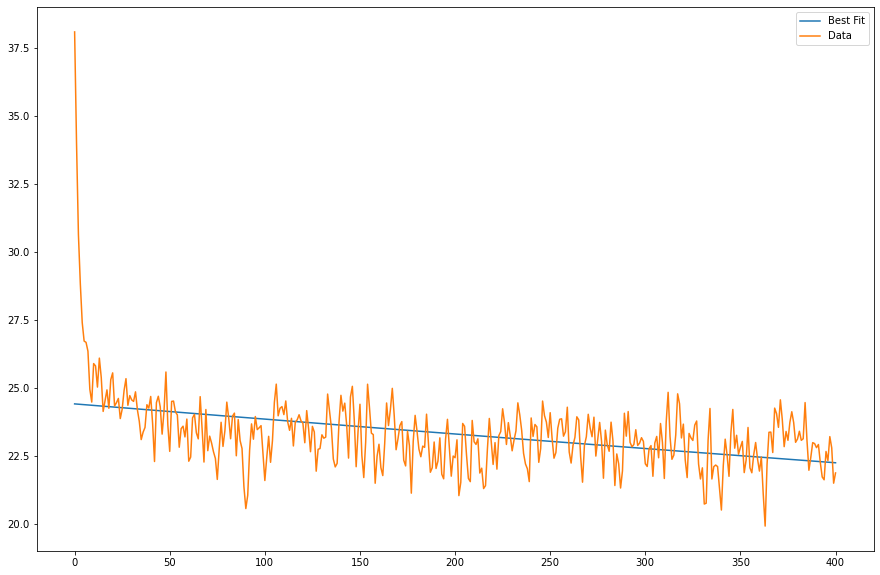

In [55]:
# Model fitting
from lmfit import Model, Parameters, minimize, report_fit
def Exponential(x, A, sigma, c=None):
    if c == None:
        c = 0
    return A * np.exp(-(x / sigma)) + c

x_array = [x for x in range(len(gas_average))]

gmodel = Model(Exponential)
params = Parameters()
params.add('A', value=40, vary=True)
params.add('alpha', value=2, vary=True)
params.add('sigma', value=100, vary=True)
gresult = gmodel.fit(gas_average, params, x=x_array)

# Plot
plt.plot(x_array, gresult.best_fit, '-', label="Best Fit")
plt.plot(x_array, gas_average, label="Data")
plt.legend()
plt.show()

print(gresult.result)

Hello
